In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv("/Users/mrsgracejidael/Documents/Market Basket Analysis - Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [60]:
df.shape

(38765, 3)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [62]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [63]:
df.duplicated().sum()

759

In [64]:
df["Member_number"].nunique()

3898

In [65]:
df["Date"].nunique()

728

In [66]:
df["itemDescription"].nunique()

167

In [67]:
# convert the 'Date' column to datetime format
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [68]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [69]:
df.describe()

,Member_number,Date
count,38765.000000,38765
mean,3003.641868,2015-01-09 18:17:12.498387712
min,1000.000000,2014-01-01 00:00:00
25%,2002.000000,2014-07-12 00:00:00
50%,3005.000000,2015-01-21 00:00:00
75%,4007.000000,2015-07-10 00:00:00
max,5000.000000,2015-12-30 00:00:00
std,1153.611031,NaN


In [70]:
# from ydata_profiling import ProfileReport


# profile = ProfileReport(df, title="Profiling Report")
# profile

In [71]:
df.Date.min(), df.Date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2015-12-30 00:00:00'))

So we have data from January 2014 through to December 2015

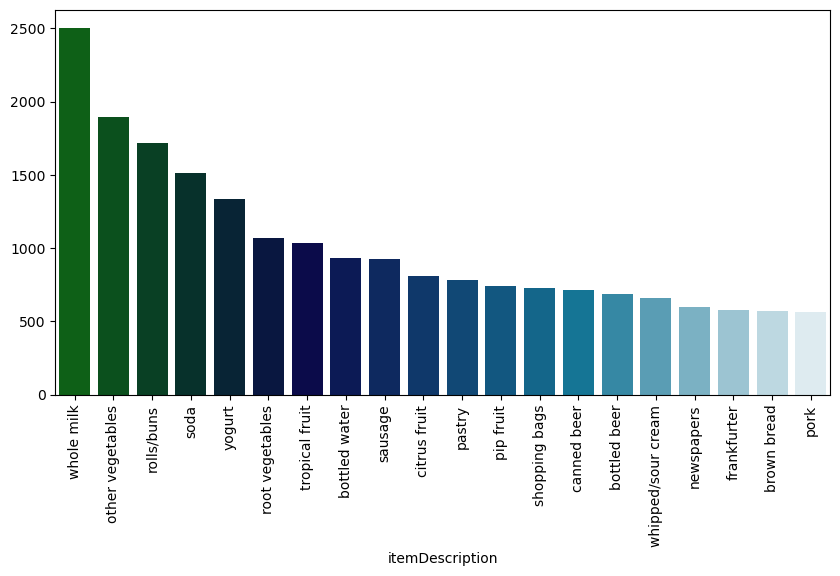

In [72]:
#most_purchased = df.itemDescription.value_counts().head(20)
plt.figure(figsize=(10, 5))

sns.barplot(x=df["itemDescription"].value_counts().head(20).index,y=df["itemDescription"].value_counts().head(20).values, data=df, palette="ocean")
plt.xticks(rotation=90)
plt.show()

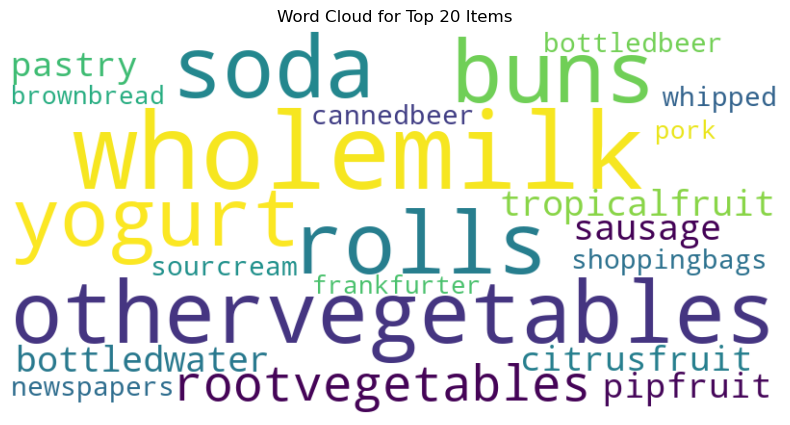

In [108]:
from wordcloud import WordCloud


top_items = df["itemDescription"].value_counts().head(20)

# Word cloud for the top 20 items

def remove(string):
    return string.replace(" ", "")


top_items = list(map(remove, list(top_items.index)))

top_items_text = ' '.join(top_items)
wordcloud = WordCloud(width=800, height=400, background_color='white', relative_scaling=0).generate(top_items_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 20 Items')
plt.show()


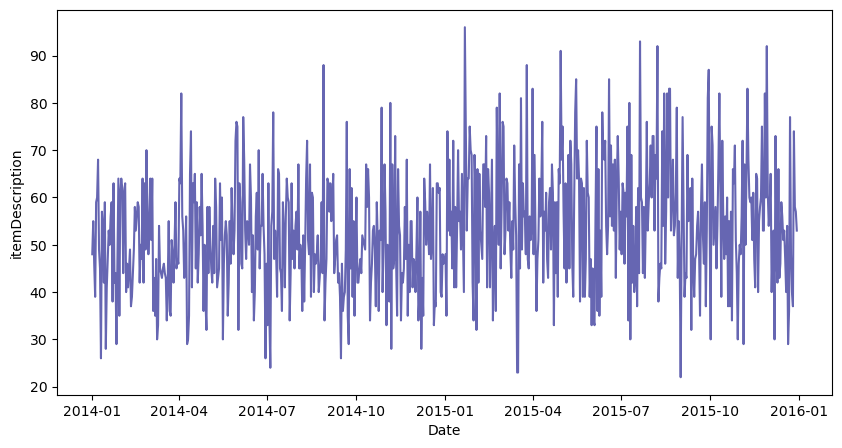

In [73]:
plt.figure(figsize=(10, 5))
a = df.groupby(["Date"]).agg({"itemDescription":"count"})
#sns.lineplot(kind="line", color="navy", alpha=0.6)
sns.lineplot(x="Date", y="itemDescription", data=a, color="navy", alpha=0.6)
plt.show()

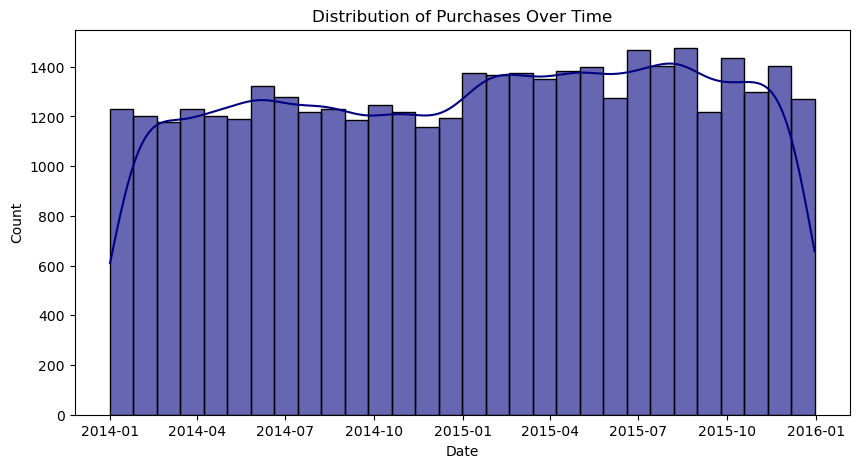

In [74]:
# Distribution of purchases over time
plt.figure(figsize=(10, 5))
sns.histplot(df['Date'], bins=30, kde=True, color="navy", alpha=0.6)
plt.title('Distribution of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [75]:
df_year = df.groupby(["Date"]).agg({"itemDescription":"count"}).reset_index()
df_year = df_year.rename(columns ={"itemDescription": "purchased_count"})


In [76]:
# sns.catplot(x='Date',y='purchased_count',data=df_year,kind='bar',aspect=3)


In [77]:
df["year"] = df["Date"].dt.year
df["quarter"] = df["Date"].dt.quarter
df["month"] = df["Date"].dt.month

df.head()

,Member_number,Date,itemDescription,year,quarter,month
0,1808,2015-07-21,tropical fruit,2015,3,7
1,2552,2015-01-05,whole milk,2015,1,1
2,2300,2015-09-19,pip fruit,2015,3,9
3,1187,2015-12-12,other vegetables,2015,4,12
4,3037,2015-02-01,whole milk,2015,1,2


In [78]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
year                        int32
quarter                     int32
month                       int32
dtype: object

In [79]:
df2 = df.groupby(["year", "quarter", "month"]).agg({"itemDescription":"count"}).reset_index()
df2 = df2.rename(columns = {"itemDescription":"purchase_count"})
df2

,year,quarter,month,purchase_count
0,2014,1,1,1527
1,2014,1,2,1437
2,2014,1,3,1411
3,2014,2,4,1561
4,2014,2,5,1615
5,2014,2,6,1570
6,2014,3,7,1576
7,2014,3,8,1575
8,2014,3,9,1472
9,2014,4,10,1591


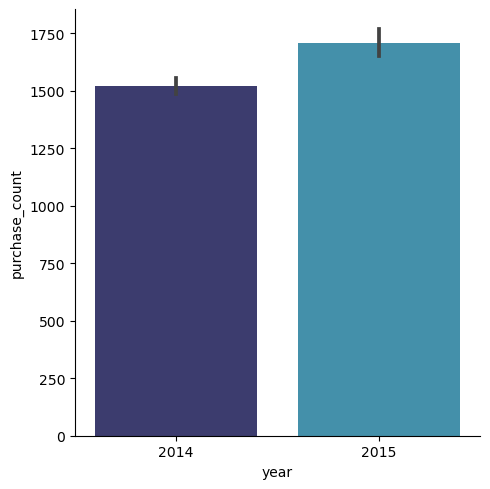

In [80]:
sns.catplot(x='year',y="purchase_count",data=df2,kind='bar', palette="ocean", alpha=0.8)
plt.show()

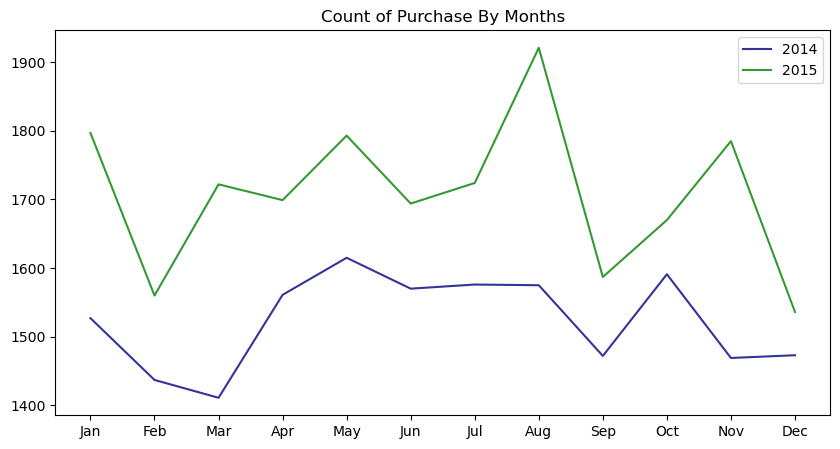

In [81]:
df2_2014 = df2.loc[df2["year"]== 2014]
df2_2015 = df2.loc[df2["year"] == 2015]


#sns.lineplot(x="month", y="purchase_count", data=df2_2014)
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.8)
plt.plot(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.8)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

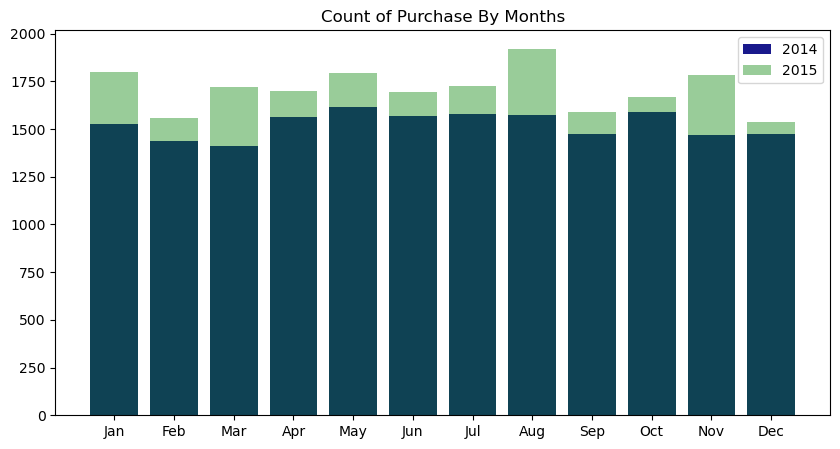

In [82]:
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.bar(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.9)
plt.bar(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.4)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

In [83]:
df2.groupby(["year"]).agg({"purchase_count":"mean"}).reset_index()

,year,purchase_count
0,2014,1523.083333
1,2015,1707.333333


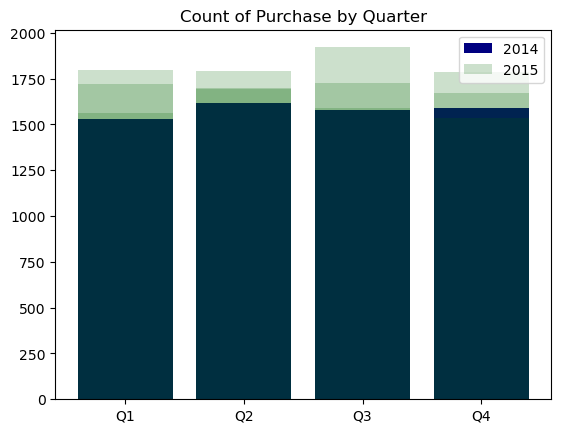

In [84]:
quarter = ["Q1", "Q2", "Q3", "Q4"]

plt.bar(df2_2014["quarter"], df2_2014["purchase_count"], color="navy", label='2014', alpha =1)
plt.bar(df2_2015["quarter"], df2_2015["purchase_count"], color='darkgreen', label='2015', alpha=0.2)

plt.title("Count of Purchase by Quarter")
plt.xticks(df2_2014["quarter"].unique(),quarter)
plt.legend(loc="best") 
plt.show()

In [85]:
df2.groupby(["year", "quarter"]).agg({"purchase_count":"mean"}).reset_index()

,year,quarter,purchase_count
0,2014,1,1458.333333
1,2014,2,1582.000000
2,2014,3,1541.000000
3,2014,4,1511.000000
4,2015,1,1693.000000
5,2015,2,1728.666667
6,2015,3,1744.000000
7,2015,4,1663.666667
